# Data Exploration for Yelp Business Dataset

This is a notebook that explores the sample Yelp dataset provided by Kaggle (https://www.kaggle.com/yelp-dataset/yelp-dataset).
 
 
This covers user data that maps to users compliments, date of joining and review metadata among other things.

### Imports and Parameters

In [2]:
pip install findspark py4j ipywidgets matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [4]:
# For local installations, use findspark to locate Spark.
import findspark
findspark.init("/Users/ana/server/spark-3.0.1-bin-hadoop2.7")

import pyspark
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import isnan, when, count, col
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

#Seaborn for data visualization
import seaborn as sns

# Pandas Options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [5]:
sc = pyspark.SparkContext(appName="data-exploration-yelp")

spark = SparkSession(sc)

In [6]:
yelp_business = "../../yelp-raw/yelp_academic_dataset_business.json"

### Initial Data Exploration

We are going to explore each dataset and understand various statistical analysis of the data.

#### Business Dataset Overview

In [7]:
business_df = spark.read.json(yelp_business)

In [8]:
business_df.show(5,False)

+-------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+--------------------------------------------------------------------------+---------------+-----------------------------------------------------------------------------+-------+----------+------------+------------------------+-----------+------------+-----+-----+
|address                  |attributes                                                                                                                                          |business_id           |categories                                                                |city           |hours                                                                        |is_open|latitude  |longitude   |name                    |postal_code|review_count|stars|state|
+-------------------------+-----------------------------------------------

In [9]:
business_df.printSchema()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [10]:
# Business ID's are unique, so we know we have about 200 thousand business.
business_df.count()

209393

#### Flatten the dataset

In [11]:
# Flattends dataframe to remove nesting.
flat_business_df = business_df.select("address", "attributes.*", "business_id", "categories", "city", "hours.*", 
                                      "is_open", "latitude", "longitude", "name", "postal_code", "review_count", 
                                      "stars", "state")

In [12]:
flat_business_df.show(5, False)

+-------------------------+----------------+-----------+-------+--------+----+-----------+----------+-----------+----------------------+--------------------------+-----------------------------------------------------------------------------------+-----------------+------+---------+-------+-------------------+-----------+---------+--------------+-----------+-----------+-----------------+---------+-----+-----+----------+-----------+--------------+-----------------+-------------------------+-------------------+------------------------+----------------------+-----------------------+-----------------------+------------------+-------+--------------------+----+----------------------+--------------------------------------------------------------------------+---------------+---------+---------+---------+---------+---------+---------+---------+-------+----------+------------+------------------------+-----------+------------+-----+-----+
|address                  |AcceptsInsurance|AgesAllowed|Alc

In [13]:
flat_business_df.printSchema()

root
 |-- address: string (nullable = true)
 |-- AcceptsInsurance: string (nullable = true)
 |-- AgesAllowed: string (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Ambience: string (nullable = true)
 |-- BYOB: string (nullable = true)
 |-- BYOBCorkage: string (nullable = true)
 |-- BestNights: string (nullable = true)
 |-- BikeParking: string (nullable = true)
 |-- BusinessAcceptsBitcoin: string (nullable = true)
 |-- BusinessAcceptsCreditCards: string (nullable = true)
 |-- BusinessParking: string (nullable = true)
 |-- ByAppointmentOnly: string (nullable = true)
 |-- Caters: string (nullable = true)
 |-- CoatCheck: string (nullable = true)
 |-- Corkage: string (nullable = true)
 |-- DietaryRestrictions: string (nullable = true)
 |-- DogsAllowed: string (nullable = true)
 |-- DriveThru: string (nullable = true)
 |-- GoodForDancing: string (nullable = true)
 |-- GoodForKids: string (nullable = true)
 |-- GoodForMeal: string (nullable = true)
 |-- HairSpecializesIn: strin

In [ ]:
flat_business_df.write.parquet("./yelp_transformed/business_v1")

In [16]:
transformed_business_df = spark.read.parquet("./yelp_transformed/business_v1")

In [17]:
transformed_business_df.printSchema()

root
 |-- address: string (nullable = true)
 |-- AcceptsInsurance: string (nullable = true)
 |-- AgesAllowed: string (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Ambience: string (nullable = true)
 |-- BYOB: string (nullable = true)
 |-- BYOBCorkage: string (nullable = true)
 |-- BestNights: string (nullable = true)
 |-- BikeParking: string (nullable = true)
 |-- BusinessAcceptsBitcoin: string (nullable = true)
 |-- BusinessAcceptsCreditCards: string (nullable = true)
 |-- BusinessParking: string (nullable = true)
 |-- ByAppointmentOnly: string (nullable = true)
 |-- Caters: string (nullable = true)
 |-- CoatCheck: string (nullable = true)
 |-- Corkage: string (nullable = true)
 |-- DietaryRestrictions: string (nullable = true)
 |-- DogsAllowed: string (nullable = true)
 |-- DriveThru: string (nullable = true)
 |-- GoodForDancing: string (nullable = true)
 |-- GoodForKids: string (nullable = true)
 |-- GoodForMeal: string (nullable = true)
 |-- HairSpecializesIn: strin

In [18]:
transformed_business_df.show(20, False)

+------------------------------------+----------------+-----------+-------+--------+----+-----------+----------+-----------+----------------------+--------------------------+------------------------------------------------------------------------------------+-----------------+------+---------+-------+-------------------+-----------+---------+--------------+-----------+-----------+-----------------+---------+-----+-----+----------+-----------+--------------+-----------------+-------------------------+-------------------+------------------------+----------------------+-----------------------+-----------------------+------------------+-------+--------------------+-----+----------------------+-----------------------------------------------------------------------------------------------------------------------------+---------------+-----------+-----------+---------+---------+-----------+-----------+-----------+-------+-------------+---------------+------------------------------+-----------

In [19]:
# Get count of all the rows to get the amount of business.
total_businesses = transformed_business_df.count()
total_businesses

209393

In [20]:
# Creates new dataframe that counts all nulls within a column iteratively.
null_df = transformed_business_df.select([count(when(col(c).isNull(), c)).alias(c) for c in transformed_business_df.columns])

In [21]:
null_pd = null_df.toPandas()

In [22]:
null_pd

,address,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking,ByAppointmentOnly,Caters,CoatCheck,Corkage,DietaryRestrictions,DogsAllowed,DriveThru,GoodForDancing,GoodForKids,GoodForMeal,HairSpecializesIn,HappyHour,HasTV,Music,NoiseLevel,Open24Hours,OutdoorSeating,RestaurantsAttire,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,business_id,categories,city,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,200733,209257,158555,155587,208653,207968,203910,119628,192861,87156,94178,148594,165424,204484,208303,209332,191854,205111,204207,140858,174211,208133,194069,156005,201481,162834,209379,150952,159826,209380,152714,153231,98105,154032,188608,143092,205123,180758,144062,0,524,0,47878,57521,69814,107276,47112,49757,47902,0,0,0,0,0,0,0,0


In [23]:
# Divide all null column counts by the amount of businesses, to get total percentage of missing values
null_percentage_pd = null_pd.div(total_businesses / 100, axis=0)
null_percentage_pd

,address,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking,ByAppointmentOnly,Caters,CoatCheck,Corkage,DietaryRestrictions,DogsAllowed,DriveThru,GoodForDancing,GoodForKids,GoodForMeal,HairSpecializesIn,HappyHour,HasTV,Music,NoiseLevel,Open24Hours,OutdoorSeating,RestaurantsAttire,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,business_id,categories,city,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0.0,95.864236,99.93505,75.721251,74.303821,99.646598,99.319461,97.381479,57.13085,92.104798,41.623168,44.976671,70.964168,79.001686,97.655605,99.479448,99.970868,91.623884,97.955041,97.523317,67.26968,83.198101,99.398261,92.681704,74.503446,96.221459,77.764777,99.993314,72.09028,76.328244,99.993792,72.93176,73.178664,46.852092,73.561198,90.073689,68.336573,97.960772,86.324758,68.799817,0.0,0.250247,0.0,22.865139,27.470355,33.341134,51.231894,22.499319,23.762494,22.8766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Filter null percentages dataframe by set percentage. Here we default by 50%, as we want to try our first pass 
# of training with relatively stable columns.

percentage_to_filter_by = 50

null_filtered_pd = null_percentage_pd[null_percentage_pd < percentage_to_filter_by]
null_filtered_na = null_filtered_pd.dropna(axis=1, how='all')
null_filtered_na

,address,BusinessAcceptsCreditCards,BusinessParking,RestaurantsPriceRange2,business_id,categories,city,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0.0,41.623168,44.976671,46.852092,0.0,0.250247,0.0,22.865139,27.470355,33.341134,22.499319,23.762494,22.8766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Filter out weekday opening time columns, as they are not going to be very useful for model recommendations.

final_null_pd = null_filtered_na.drop(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], axis=1)
final_null_pd

,address,BusinessAcceptsCreditCards,BusinessParking,RestaurantsPriceRange2,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0.0,41.623168,44.976671,46.852092,0.0,0.250247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
columns_to_keep = final_null_pd.columns.tolist()
columns_to_keep

['address',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'RestaurantsPriceRange2',
 'business_id',
 'categories',
 'city',
 'is_open',
 'latitude',
 'longitude',
 'name',
 'postal_code',
 'review_count',
 'stars',
 'state']

In [27]:
filtered_business_df = transformed_business_df.select(*columns_to_keep)
filtered_business_df.show(5, False)

+-------------------------+--------------------------+-----------------------------------------------------------------------------------+----------------------+----------------------+--------------------------------------------------------------------------+---------------+-------+----------+------------+------------------------+-----------+------------+-----+-----+
|address                  |BusinessAcceptsCreditCards|BusinessParking                                                                    |RestaurantsPriceRange2|business_id           |categories                                                                |city           |is_open|latitude  |longitude   |name                    |postal_code|review_count|stars|state|
+-------------------------+--------------------------+-----------------------------------------------------------------------------------+----------------------+----------------------+--------------------------------------------------------------------------+-

In [28]:
# Create a widget for mapping the value counts for individual columns
dropdown_columns = widgets.Dropdown(options = filtered_business_df.columns)

output_column = widgets.Output()

def dropdown_columns_event_handler(change):
    output_column.clear_output()
    
    filtered_business_df.groupBy(change.new).count().sort(col("count").desc()).show(50, False)

dropdown_columns.observe(dropdown_columns_event_handler, names='value')
display(dropdown_columns)

Dropdown(options=('address', 'BusinessAcceptsCreditCards', 'BusinessParking', 'RestaurantsPriceRange2', 'busin…

### Data Visualization Exploration

In [29]:
stars_count_df = filtered_business_df.groupBy(col("stars")).count().sort(col("count").desc())
stars_count_df.show(10, False)

+-----+-----+
|stars|count|
+-----+-----+
|4.0  |39199|
|3.5  |38079|
|4.5  |29940|
|3.0  |28634|
|5.0  |27080|
|2.5  |21435|
|2.0  |13124|
|1.5  |6004 |
|1.0  |5898 |
+-----+-----+



In [30]:
stars_pd = stars_count_df.toPandas()
stars_pd.head(10)

,stars,count
0,4.0,39199
1,3.5,38079
2,4.5,29940
3,3.0,28634
4,5.0,27080
5,2.5,21435
6,2.0,13124
7,1.5,6004
8,1.0,5898


#### Star reviews on business analysis

In this graph, we can see that most of the stars skew from 3 to 5, and 1 to 2.5 stars are less common.

We can see that most places don't dip below 2.5 stars and that reviews skew more positive than negative.

When recommending a business we will need to keep that in mind.

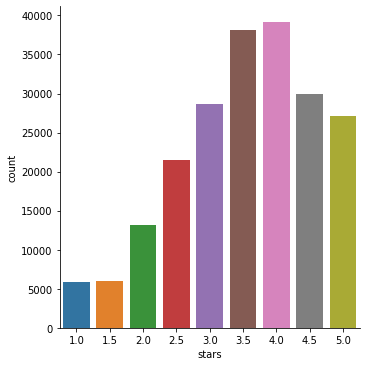

In [31]:
sns.catplot(x="stars", y="count", kind="bar", data=stars_pd)

plt.show()

#### Find Business by ID

Utility section for returning a row based on business ID.

In [53]:
business_id = 'JmI9nslLD7KZqRr__Bg6NQ'

result = filtered_business_df.where(filtered_business_df.business_id == business_id)
result.show(5, False)

+----------------------+--------------------------+---------------+----------------------+----------------------+-------------------------+-------+-------+------------+---------------+----------------------------------------+-----------+------------+-----+-----+
|address               |BusinessAcceptsCreditCards|BusinessParking|RestaurantsPriceRange2|business_id           |categories               |city   |is_open|latitude    |longitude      |name                                    |postal_code|review_count|stars|state|
+----------------------+--------------------------+---------------+----------------------+----------------------+-------------------------+-------+-------+------------+---------------+----------------------------------------+-----------+------------+-----+-----+
|3400 E Sky Harbor Blvd|null                      |null           |null                  |JmI9nslLD7KZqRr__Bg6NQ|Airports, Hotels & Travel|Phoenix|1      |33.435471591|-112.0088027608|Phoenix Sky Harbor Internat